In [256]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))

In [257]:
# PEGASOR INDOOR AND OUTDOOR DATA
i_ldsa=pd.read_excel('/Users/stella/Desktop/realeco_sn0135-ldsa_2017-01-23t181000_2017-07-01t181000.xlsx')
i_ldsa=i_ldsa.set_index('time')
i_pn=pd.read_excel('/Users/stella/Desktop/realeco_sn0135-pm25_2017-01-19t181600_2017-07-01t181600.xlsx')
i_pn=i_pn.set_index('time')
i_pm25=pd.read_excel('/Users/stella/Desktop/realeco_sn0135-pn_2017-01-25t183900_2017-07-01t183900.xlsx')
i_pm25=i_pm25.set_index('time')

i_df=(i_ldsa.join(i_pn)).join(i_pm25).dropna()
i_df.columns=['i-ldsa','i-pm25','i-pn']

urban=pd.read_csv('/Users/stella/Desktop/1329_PEGASOR A_20170712185105-2.csv',delimiter=',')
urban['DateTime']=urban['DateTime'].apply(lambda x: parse(x))
urban.columns=['time','ldsa-1','pn-1','pm25-1','ldsa-2','pn-2','pm25-2']
urban=urban.set_index('time')

pegasor=i_df.join(urban).reset_index()
pegasor.head()

,time,i-ldsa,i-pm25,i-pn,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
0,2017-01-25 13:39:00,3.304210,0.872990,368.935,12.260,10042.384,0.482,13.902,11634.118,0.558
1,2017-01-25 13:40:00,3.357189,0.875623,377.458,12.260,10042.384,0.482,12.866,10769.608,0.517
2,2017-01-25 13:41:00,3.398347,0.880263,383.497,12.260,10042.384,0.482,12.866,10769.608,0.517
3,2017-01-25 13:42:00,3.393449,0.850978,389.758,11.821,9682.168,0.465,9.837,8233.191,0.395
4,2017-01-25 13:43:00,3.272805,0.808077,378.986,11.821,9682.168,0.465,9.837,8233.191,0.395


In [267]:
urb=urban.reset_index()

In [268]:
urb=urb[(urb['time']>datetime.date(2017,3,21)) & (urb['time']<datetime.date(2017,3,22))]

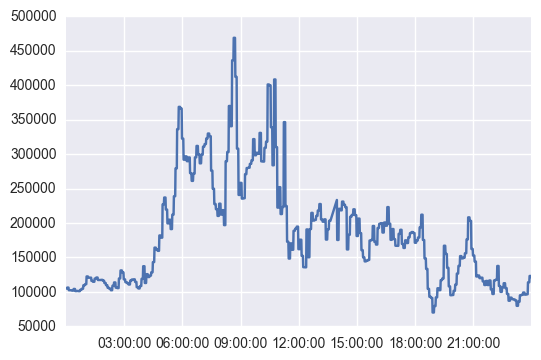

In [269]:
plt.plot(urb['time'][urb['pn-1']>0],urb['pn-1'][urb['pn-1']>0])

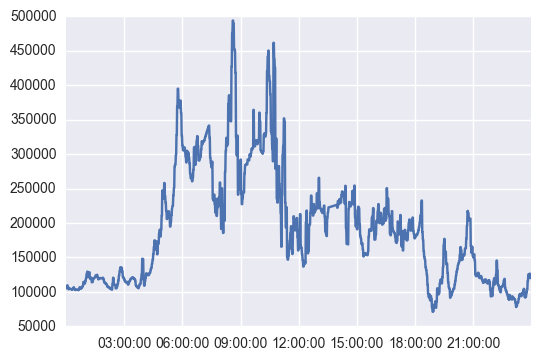

In [270]:
plt.plot(urb['time'][urb['pn-2']>0],urb['pn-2'][urb['pn-2']>0])

In [262]:
urb.loc[:80034].tail()
#urb[urb['pn-2']>80000].head()

,time,ldsa-1,pn-1,pm25-1,ldsa-2,pn-2,pm25-2
80030,2017-03-21 13:54:00,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
80031,2017-03-21 13:55:00,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
80032,2017-03-21 13:56:00,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
80033,2017-03-21 13:57:00,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000
80034,2017-03-21 13:58:00,47.947,38889.065,1.867,39.101,226269.852,1.552


In [263]:
urban=urban.reset_index()

In [264]:
urban['pn-1'].loc[:80034]=urban['pn-1'].loc[:80034]*6

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [265]:
urban['pn-2'].loc[:80033]=urban['pn-2'].loc[:80033]*6

/Users/stella/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


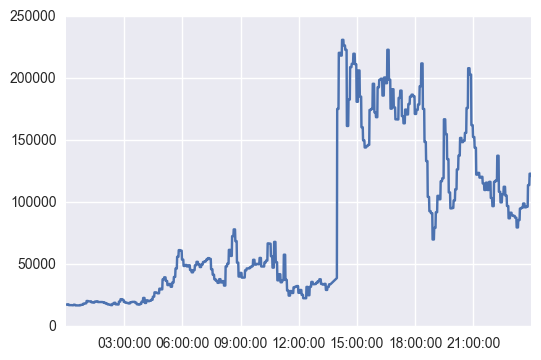

In [266]:
plt.plot(urb['time'][urb['pn-1']>0],urb['pn-1'][urb['pn-1']>0])

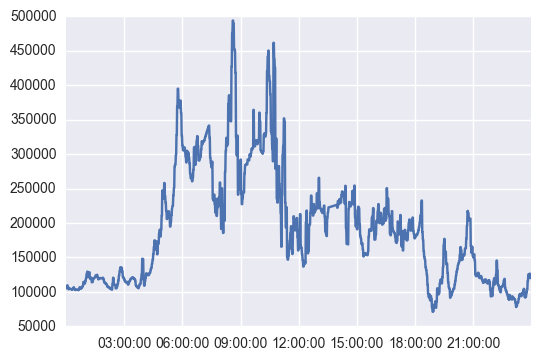

In [271]:
plt.plot(urb['time'][urb['pn-2']>0],urb['pn-2'][urb['pn-2']>0])

In [138]:
# 1/cm³          µg/m³          µm²/cm³

In [139]:
#feb-april     TEOM
feb_apr_teom=pd.read_excel('/Users/stella/Desktop/queens-data/Queens Data Logger TEOM 1 Hour Data February to April.xls')[:-8]
feb_apr_teom = feb_apr_teom.rename(columns=feb_apr_teom.iloc[1])
feb_apr_teom = feb_apr_teom[3:]
feb_apr_teom=feb_apr_teom[['Date&Time','PM2.5_FEM_MC','PM2.5_MC']]
feb_apr_teom['Date&Time']=feb_apr_teom['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M %p'))

#may-june      TEOM
may_jun_teom=pd.read_csv('/Users/stella/Desktop/queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_teom = may_jun_teom.rename(columns=may_jun_teom.iloc[1])
may_jun_teom = may_jun_teom[3:]
may_jun_teom=may_jun_teom[['Date&Time','PM2.5_FEM_MC','PM2.5_MC']]
may_jun_teom['Date&Time']=may_jun_teom['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M %p'))

teom=pd.concat([feb_apr_teom,may_jun_teom])
teom.head()

,Date&Time,PM2.5_FEM_MC,PM2.5_MC
3,2017-02-01 12:00:00,18.25,20.02
4,2017-02-01 01:00:00,19.18,20.98
5,2017-02-01 02:00:00,14.51,16.15
6,2017-02-01 03:00:00,15.93,17.63
7,2017-02-01 04:00:00,10.82,12.25


In [140]:
#april         3783
apr_3783=pd.read_excel('/Users/stella/Desktop/queens-data/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:-8]
apr_3783['Date&Time']=apr_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M %p'))

#may-june      3783
may_jun_3783=pd.read_csv('/Users/stella/Desktop/queens-data/TEOM_TSI 3783_May-June_2017.csv')[:-8]
may_jun_3783 = may_jun_3783.rename(columns=may_jun_3783.iloc[1])
may_jun_3783 = may_jun_3783[3:]
may_jun_3783=may_jun_3783[['Date&Time','UF Aggregated Conc.']]
may_jun_3783['Date&Time']=may_jun_3783['Date&Time'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M %p'))

tsi_3783=pd.concat([apr_3783,may_jun_3783])
tsi_3783.head()

,Date&Time,UF Aggregated Conc.
1,2017-04-11 08:00:00,24268
2,2017-04-11 09:00:00,24445
3,2017-04-11 10:00:00,36088
4,2017-04-11 11:00:00,38883
5,2017-04-11 12:00:00,46482


In [141]:
#april         3031
apr_3031=pd.read_csv('/Users/stella/Desktop/queens-data/TSI 3031 Particle Counter_20170413-april.TXT',delimiter='\t',skiprows=4)
apr_3031=apr_3031.reset_index()
apr_3031.columns=apr_3031.iloc[0]
apr_3031=apr_3031.iloc[1:].reset_index()
apr_3031['start']=apr_3031['start'].apply(lambda x: parse(x))
apr_3031['end']=apr_3031['end'].apply(lambda x: parse(x))
apr_3031=apr_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

#may-june      3031
may_jun_3031=pd.read_csv('/Users/stella/Desktop/queens-data/TSI 3031_20170501.TXT',delimiter='\t',skiprows=4)
may_jun_3031=may_jun_3031.reset_index()
may_jun_3031.columns=may_jun_3031.iloc[0]
may_jun_3031=may_jun_3031.iloc[1:].reset_index()
may_jun_3031['start']=may_jun_3031['start'].apply(lambda x: parse(x))
may_jun_3031['end']=may_jun_3031['end'].apply(lambda x: parse(x))
may_jun_3031=may_jun_3031[['start','end','ch1','ch2','ch3','ch4','ch5','ch6']]

tsi_3031=pd.concat([apr_3031,may_jun_3031])
tsi_3031.head()

,start,end,ch1,ch2,ch3,ch4,ch5,ch6
0,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.000,2974.000,81.000,73.000,254.000,17.000
1,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.000,3887.000,216.000,39.000,218.000,15.000
2,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.000,4318.000,215.000,95.000,313.000,1.000
3,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.000,4295.000,232.000,205.000,399.000,0.000
4,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.000,6271.000,650.000,0.000,115.000,51.000


In [142]:
tsi_3031.head()

,start,end,ch1,ch2,ch3,ch4,ch5,ch6
0,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.000,2974.000,81.000,73.000,254.000,17.000
1,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.000,3887.000,216.000,39.000,218.000,15.000
2,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.000,4318.000,215.000,95.000,313.000,1.000
3,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.000,4295.000,232.000,205.000,399.000,0.000
4,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.000,6271.000,650.000,0.000,115.000,51.000


In [143]:
tsi_3031.tail()

,start,end,ch1,ch2,ch3,ch4,ch5,ch6
5850,2017-06-30 22:45:07,2017-06-30 22:59:37,1384.000,1298.000,575.000,542.000,1066.000,163.000
5851,2017-06-30 23:00:06,2017-06-30 23:14:36,1136.000,1142.000,535.000,533.000,1056.000,171.000
5852,2017-06-30 23:15:07,2017-06-30 23:29:37,1099.000,1094.000,502.000,503.000,1061.000,172.000
5853,2017-06-30 23:30:06,2017-06-30 23:44:36,1934.000,2857.000,1325.000,776.000,996.000,205.000
5854,2017-06-30 23:45:07,2017-06-30 23:59:37,1322.000,1862.000,1013.000,730.000,1055.000,192.000


In [144]:
tsi_3783.head()

,Date&Time,UF Aggregated Conc.
1,2017-04-11 08:00:00,24268
2,2017-04-11 09:00:00,24445
3,2017-04-11 10:00:00,36088
4,2017-04-11 11:00:00,38883
5,2017-04-11 12:00:00,46482


In [145]:
tsi_3783.tail()

,Date&Time,UF Aggregated Conc.
87839,2017-06-30 11:56:00,8955
87840,2017-06-30 11:57:00,9130
87841,2017-06-30 11:58:00,9320
87842,2017-06-30 11:59:00,9440
87843,2017-07-01 12:00:00,9525


ValueError: could not convert string to float: '---'

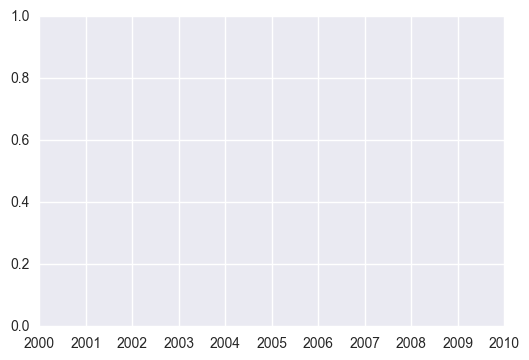

In [146]:
plt.plot(tsi_3783['Date&Time'],tsi_3783['UF Aggregated Conc.'])

In [ ]:
list(tsi_3783['Date&Time'])

In [ ]:
peg=pegasor[pegasor['time']>datetime.date(2017,2,1)].reset_index()
del peg['index']

In [ ]:
peg=peg[peg>0]

In [ ]:
times=pd.DatetimeIndex(peg.time)

In [ ]:
peg_grouped=peg.groupby([times.month, times.day]).mean().reset_index()

In [ ]:
peg_grouped=peg_grouped.rename(columns={'level_0':'month','level_1':'day'})

In [ ]:
peg_grouped['year']=2017

In [ ]:
peg_grouped['date']=pd.to_datetime(peg_grouped[['year','month','day']])

In [ ]:
del peg_grouped['month'], peg_grouped['day'], peg_grouped['year']

In [ ]:
peg_grouped.head()

In [ ]:
plt.plot(peg_grouped['date'],peg_grouped['pm25-1'])
plt.plot(peg_grouped['date'],peg_grouped['pm25-2'])
plt.legend()
plt.title('Queens - PM2.5')

In [ ]:
plt.plot(peg_grouped['date'],peg_grouped['pn-1'])
plt.plot(peg_grouped['date'],peg_grouped['pn-2'])

In [ ]:
plt.plot(peg_grouped['date'],peg_grouped['ldsa-1'])
plt.plot(peg_grouped['date'],peg_grouped['ldsa-2'])
plt.legend()
plt.title('Queens - LDSA')

In [ ]:
x=peg_grouped['ldsa-1']
y=peg_grouped['ldsa-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

In [ ]:
x=peg_grouped['i-ldsa']
y=peg_grouped['ldsa-2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)

In [ ]:
plt.plot(peg_grouped['date'],peg_grouped['i-ldsa'])
plt.plot(peg_grouped['date'],peg_grouped['ldsa-1'])
plt.plot(peg_grouped['date'],peg_grouped['ldsa-2'])
plt.legend()
plt.title('Queens - Indoor & Outdoor')

In [ ]:
plt.plot(peg_grouped['date'],peg_grouped['i-ldsa'])
plt.plot(peg_grouped['date'],peg_grouped['i-pm25'])
#plt.plot(peg_grouped['date'],peg_grouped['i-pn'])
plt.title('Queens - Indoor')
plt.legend()